Day2,3の知識をもとに前処理しよう
やることは、標準化、大事な変数の選択、説明関数の相関の確認である。

In [1]:
#Day1のデータを読み込み
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,recall_score,precision_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
df_day1 = pd.read_csv("Day1_date.csv")
print(df_day1.columns[0])
df_day1 = df_day1.drop([df_day1.columns[0]],axis = 1)
df_day1.head()

Unnamed: 0


state  usd_goal_real  Days  main_category_Art  main_category_Comics  \
0  False        1533.95    58                  0                     0   
1  False       30000.00    59                  0                     0   
2  False       45000.00    44                  0                     0   
3  False        5000.00    29                  0                     0   
4   True       50000.00    34                  0                     0   

   main_category_Crafts  main_category_Dance  main_category_Design  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   main_category_Fashion  main_category_Film & Video  ...  country_JP  \
0                      0                           0  ...           0   
1                      0                           1  ...           0   
2                      0                           1  ...           0   
3                      0                           0  ...           0   
4                      0                           0  ...           0   

   country_LU  country_MX  country_N,0"  country_NL  country_NO  country_NZ  \
0           0           0             0           0           0           0   
1           0           0             0           0           0           0   
2           0           0             0           0           0           0   
3           0           0             0           0           0           0   
4           0           0             0           0           0           0   

   country_SE  country_SG  country_US  
0           0           0           0  
1           0           0           1  
2           0           0           1  
3           0           0           1  
4           0           0           1  

[5 rows x 55 columns]

In [2]:
#標準化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df_standar = df_day1.copy()
col_names = ['usd_goal_real', 'Days']
features = df_day1[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standar[col_names] = features 
df_standar.head()

state  usd_goal_real      Days  main_category_Art  main_category_Comics  \
0  False      -0.036049  1.969999                  0                     0   
1  False      -0.010379  2.048657                  0                     0   
2  False       0.003147  0.868787                  0                     0   
3  False      -0.032923 -0.311084                  0                     0   
4   True       0.007656  0.082206                  0                     0   

   main_category_Crafts  main_category_Dance  main_category_Design  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   main_category_Fashion  main_category_Film & Video  ...  country_JP  \
0                      0                           0  ...           0   
1                      0                           1  ...           0   
2                      0                           1  ...           0   
3                      0                           0  ...           0   
4                      0                           0  ...           0   

   country_LU  country_MX  country_N,0"  country_NL  country_NO  country_NZ  \
0           0           0             0           0           0           0   
1           0           0             0           0           0           0   
2           0           0             0           0           0           0   
3           0           0             0           0           0           0   
4           0           0             0           0           0           0   

   country_SE  country_SG  country_US  
0           0           0           0  
1           0           0           1  
2           0           0           1  
3           0           0           1  
4           0           0           1  

[5 rows x 55 columns]

In [3]:
#説明変数について
#国と通貨は関連が強そう、今回は通貨を採択
df_standar.columns[32:]
drop_col = df_standar.columns[32:]
df_drop_date = df_standar.drop(drop_col,axis = 1)
df_drop_date.columns

Index(['state', 'usd_goal_real', 'Days', 'main_category_Art',
       'main_category_Comics', 'main_category_Crafts', 'main_category_Dance',
       'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'currency_AUD', 'currency_CAD', 'currency_CHF',
       'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_HKD',
       'currency_JPY', 'currency_MXN', 'currency_NOK', 'currency_NZD',
       'currency_SEK', 'currency_SGD', 'currency_USD'],
      dtype='object')

In [4]:
#スッテプワイズ法
from sklearn.feature_selection import RFECV
estimator = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3 )
rfecv = RFECV(estimator, cv=10, scoring='accuracy')
y = df_drop_date["state"].values
X = df_drop_date.drop("state", axis=1).values
rfecv.fit(X, y)

RFECV(cv=10,
      estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                              early_stopping=False, epsilon=0.1, eta0=0.0,
                              fit_intercept=True, l1_ratio=0.15,
                              learning_rate='optimal', loss='log',
                              max_iter=10000, n_iter_no_change=5, n_jobs=None,
                              penalty='none', power_t=0.5, random_state=1234,
                              shuffle=True, tol=0.001, validation_fraction=0.1,
                              verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [5]:
print('Feature ranking: \n{}'.format(rfecv.ranking_))
remove_idx = ~rfecv.support_
remove_feature = df_drop_date.drop("state", axis=1).columns[remove_idx]
selected_train_data = df_drop_date.drop(remove_feature, axis=1)
selected_train_data

Feature ranking: 
[1 1 9 1 1 1 3 1 8 1 2 1 1 1 1 1 1 1 5 7 1 1 1 1 1 1 1 4 6 1 1]


state  usd_goal_real      Days  main_category_Comics  \
0       False      -0.036049  1.969999                     0   
1       False      -0.010379  2.048657                     0   
2       False       0.003147  0.868787                     0   
3       False      -0.032923 -0.311084                     0   
4        True       0.007656  0.082206                     0   
...       ...            ...       ...                   ...   
331667  False      -0.031571 -0.311084                     0   
331668  False      -0.036079 -0.547058                     0   
331669  False      -0.023906  0.947445                     0   
331670  False      -0.023906 -0.232426                     0   
331671  False      -0.035629 -0.468400                     0   

        main_category_Crafts  main_category_Dance  main_category_Fashion  \
0                          0                    0                      0   
1                          0                    0                      0   
2                          0                    0                      0   
3                          0                    0                      0   
4                          0                    0                      0   
...                      ...                  ...                    ...   
331667                     0                    0                      0   
331668                     0                    0                      0   
331669                     0                    0                      0   
331670                     0                    0                      0   
331671                     0                    0                      0   

        main_category_Food  main_category_Journalism  main_category_Music  \
0                        0                         0                    0   
1                        0                         0                    0   
2                        0                         0                    0   
3                        0                         0                    1   
4                        1                         0                    0   
...                    ...                       ...                  ...   
331667                   1                         0                    0   
331668                   0                         0                    0   
331669                   0                         0                    0   
331670                   0                         0                    0   
331671                   0                         0                    0   

        ...  currency_AUD  currency_DKK  currency_EUR  currency_GBP  \
0       ...             0             0             0             1   
1       ...             0             0             0             0   
2       ...             0             0             0             0   
3       ...             0             0             0             0   
4       ...             0             0             0             0   
...     ...           ...           ...           ...           ...   
331667  ...             0             0             0             0   
331668  ...             0             0             0             0   
331669  ...             0             0             0             0   
331670  ...             0             0             0             0   
331671  ...             0             0             0             0   

        currency_HKD  currency_JPY  currency_MXN  currency_NOK  currency_SGD  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...      

In [6]:
#多重共線性が無いことを確認する。　10以下ならOK
from sklearn.linear_model import LinearRegression

print("VIFの計算")
df = selected_train_data.drop("state", axis=1)
for cname in df.columns:  
    y=df[cname]
    X=df.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    print(cname,":" ,1/(1-np.power(rsquared,2)))

VIFの計算
usd_goal_real : 1.0000009579251448
Days : 1.0000618888897503
main_category_Comics : 1.0015844318737812
main_category_Crafts : 1.001051513477537
main_category_Dance : 1.0002425163806787
main_category_Fashion : 1.0053885003045813
main_category_Food : 1.0062919728659876
main_category_Journalism : 1.0003081753713299
main_category_Music : 1.0196987745514001
main_category_Photography : 1.0015160927112985
main_category_Publishing : 1.0128463038318698
main_category_Technology : 1.010464344255785
main_category_Theater : 1.0018339910745115
currency_AUD : 1.0857784943139777
currency_DKK : 1.0028148531406285
currency_EUR : 1.2593859051586744
currency_GBP : 1.6183642239775504
currency_HKD : 1.000812431835536
currency_JPY : 1.0000021784770092
currency_MXN : 1.0061967991433152
currency_NOK : 1.0011583821702346
currency_SGD : 1.0007359790638792
currency_USD : 2.152444191446391


In [7]:
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
test_size = 0.2
y = selected_train_data["state"].values
X = selected_train_data.drop("state", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3, )
clf.fit(X_train, y_train)

# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)

# 対数尤度を表示
# log_lossという関数は、負の対数尤度を返す
# normalizeという引数をTrueにすると、合計の対数尤度ではなく平均の対数尤度が計算される
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est_proba, normalize=False))) 

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

対数尤度 = -41846.241
正答率 = 64.339%


In [8]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':['linear'], 'C':[1, 5]}
#model = SVC(gamma="scale") # gamma=scaleにすると、gammaが自動で計算される
#clf = GridSearchCV(model, parameters, cv=3,)
#clf.fit(X_train, y_train)
#print(clf.best_params_, clf.best_score_)

In [9]:
print("OK")
df_drop_date

OK


state  usd_goal_real      Days  main_category_Art  \
0       False      -0.036049  1.969999                  0   
1       False      -0.010379  2.048657                  0   
2       False       0.003147  0.868787                  0   
3       False      -0.032923 -0.311084                  0   
4        True       0.007656  0.082206                  0   
...       ...            ...       ...                ...   
331667  False      -0.031571 -0.311084                  0   
331668  False      -0.036079 -0.547058                  0   
331669  False      -0.023906  0.947445                  0   
331670  False      -0.023906 -0.232426                  0   
331671  False      -0.035629 -0.468400                  1   

        main_category_Comics  main_category_Crafts  main_category_Dance  \
0                          0                     0                    0   
1                          0                     0                    0   
2                          0                     0                    0   
3                          0                     0                    0   
4                          0                     0                    0   
...                      ...                   ...                  ...   
331667                     0                     0                    0   
331668                     0                     0                    0   
331669                     0                     0                    0   
331670                     0                     0                    0   
331671                     0                     0                    0   

        main_category_Design  main_category_Fashion  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   
...                      ...                    ...   
331667                     0                      0   
331668                     0                      0   
331669                     0                      0   
331670                     0                      0   
331671                     0                      0   

        main_category_Film & Video  ...  currency_EUR  currency_GBP  \
0                                0  ...             0             1   
1                                1  ...             0             0   
2                                1  ...             0             0   
3                                0  ...             0             0   
4                                0  ...             0             0   
...                            ...  ...           ...           ...   
331667                           0  ...             0             0   
331668                           1  ...             0             0   
331669                           1  ...             0             0   
331670                           0  ...             0             0   
331671                           0  ...             0             0   

        currency_HKD  currency_JPY  currency_MXN  currency_NOK  currency_NZD  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
331667             0             0             0             0             0   
331668             0             0             0             0             0   
331669             0             0             0             0             0   
331670             0             0             0            

In [10]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
# estimatorにモデルをセット
# LassoCVを使って、正則化の強さは自動決定
estimator = LassoCV(normalize=True, cv=10)

# モデルの情報を使って特徴選択を行う場合は、SelectFromModelを使う
# 今回は係数が1e-1以下である特徴を削除する
# 係数のしきい値はthresholdで指定する
sfm = SelectFromModel(estimator, threshold=1e-1)
y = df_drop_date["state"].values
X = df_drop_date.drop("state", axis=1).values

# fitで特徴選択を実行
sfm.fit(X, y)
sfm.get_support()

array([False, False, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False])

In [11]:
# 削除すべき特徴の名前を取得 
removed_idx  = ~sfm.get_support()
drop_col = df_drop_date.drop("state", axis=1).columns[removed_idx]
selected_train_data2 = df_drop_date.drop(drop_col,axis = 1)
selected_train_data2.columns

Index(['state', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Fashion', 'main_category_Food',
       'main_category_Journalism', 'main_category_Music',
       'main_category_Technology', 'main_category_Theater', 'currency_MXN'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
test_size = 0.2
x_
y = selected_train_data2["state"].values
X = selected_train_data2.drop("state", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3, )
clf.fit(X_train, y_train)

# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)

# 対数尤度を表示
# log_lossという関数は、負の対数尤度を返す
# normalizeという引数をTrueにすると、合計の対数尤度ではなく平均の対数尤度が計算される
print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est_proba, normalize=False))) 

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

対数尤度 = -43263.555
正答率 = 62.107%


In [51]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#ジニ係数で判断,max_depth どんだけ深くするか,min_sample_split どんだけデータがあれば枝をはるか,min_samples_leaf 枝の葉っぱに最低何個あるか
clf = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=3, min_samples_leaf=3, random_state=1234)
clf = clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))
print(clf.predict(X_test)) #予測したい場合

score= 0.6210554879266744
[False False False ... False  True False]


In [53]:
# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
display(conf_mat)

print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_est)))
print("precission : {:.5f}".format(precision_score(y_test, y_est)))
print("recall : {:.5f}".format(recall_score(y_test, y_est)))

予測 = 成功  予測 = 失敗
正解 = 成功    33449     6100
正解 = 失敗    19037     7749

Accuracy: 0.62106
precission : 0.55953
recall : 0.28929


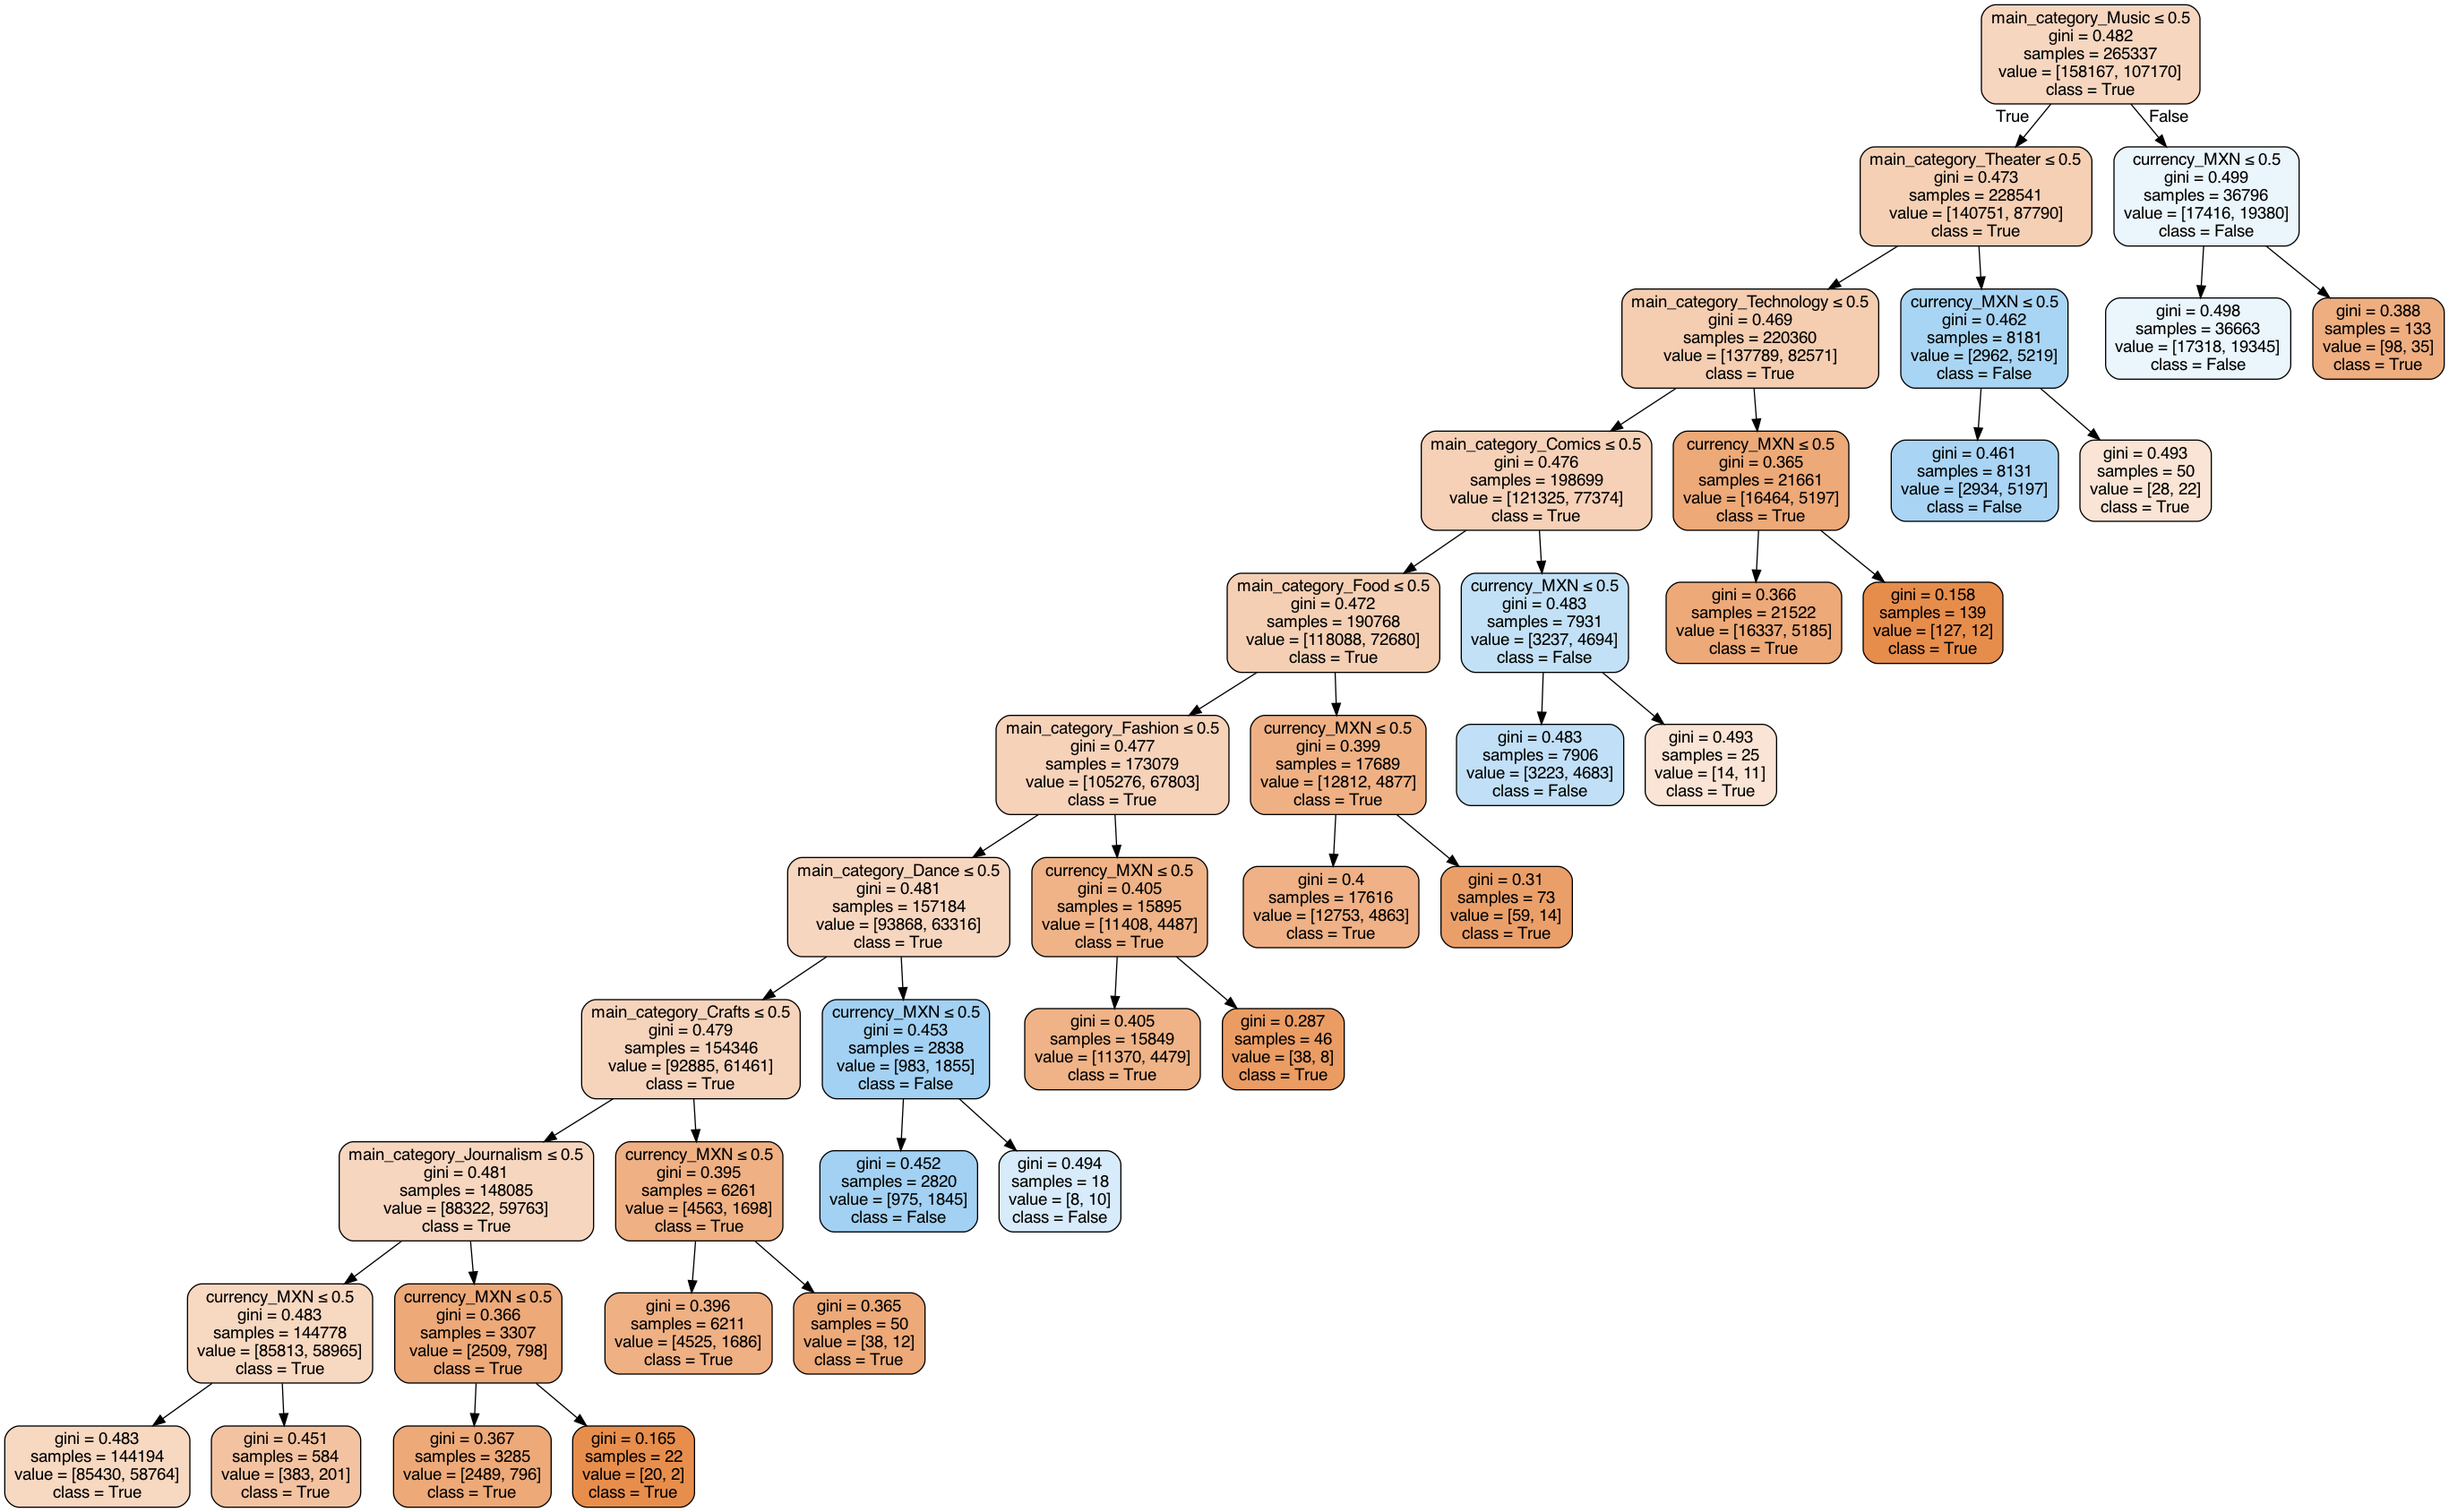

In [52]:
# 決定木の描画
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
X_name = selected_train_data2.drop("state", axis=1)
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=X_name.columns,  
                     class_names=["True","False"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [54]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=4, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

score= 0.6122440519038054


In [55]:
# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
display(conf_mat)

print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_est)))
print("precission : {:.5f}".format(precision_score(y_test, y_est)))
print("recall : {:.5f}".format(recall_score(y_test, y_est)))

予測 = 成功  予測 = 失敗
正解 = 成功    34494     5055
正解 = 失敗    20662     6124

Accuracy: 0.61232
precission : 0.54781
recall : 0.22863


0


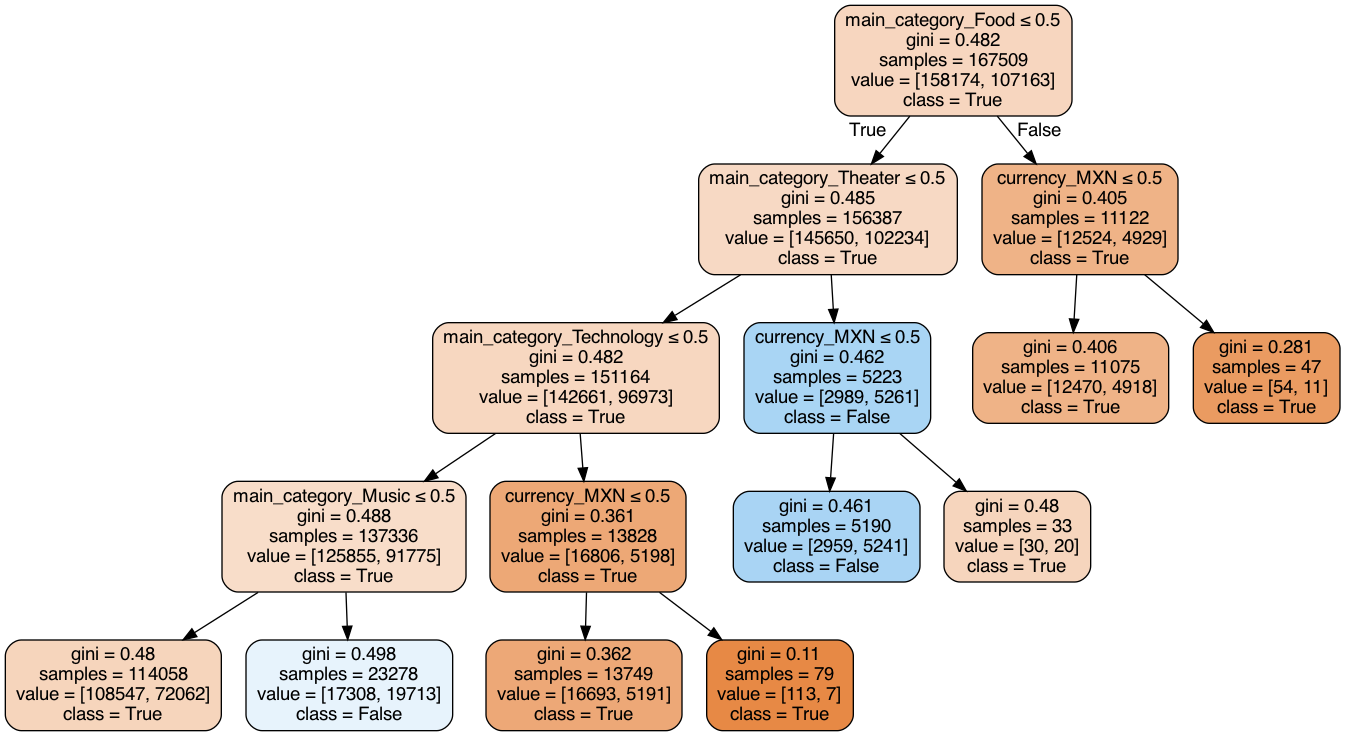

1


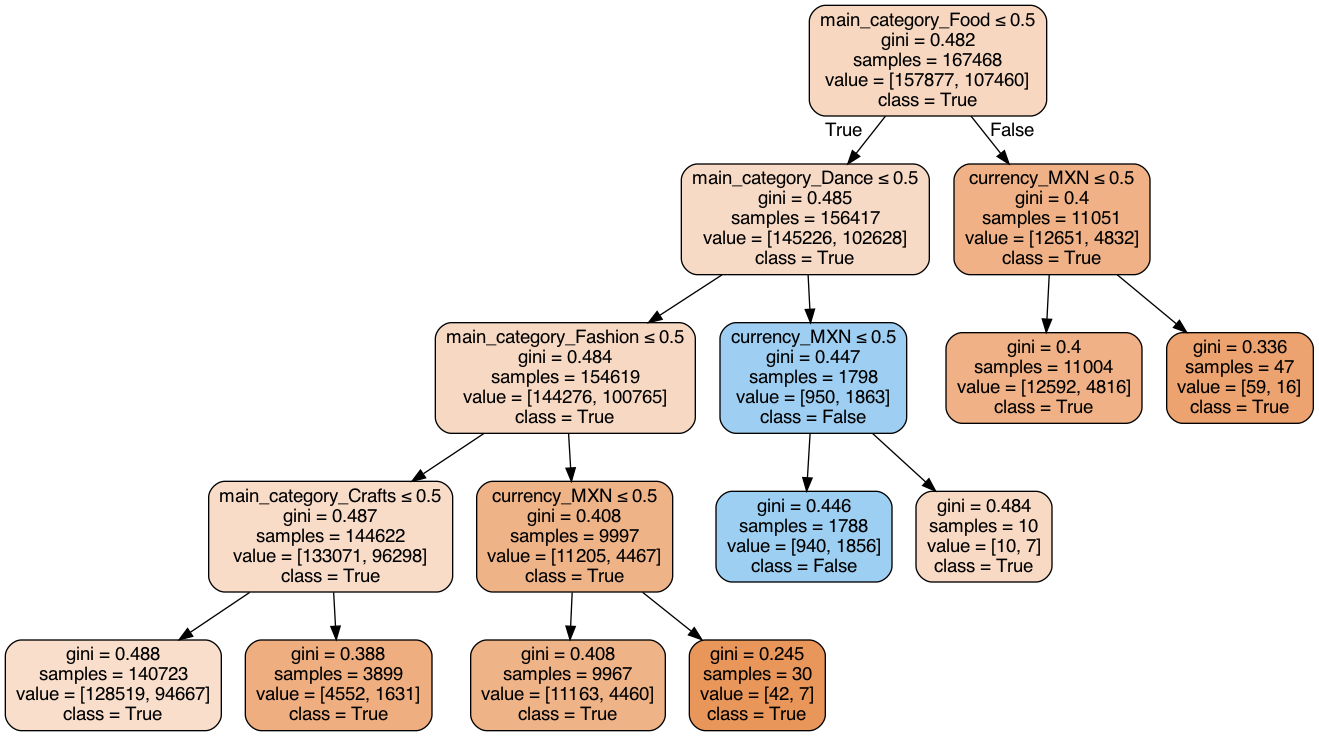

2


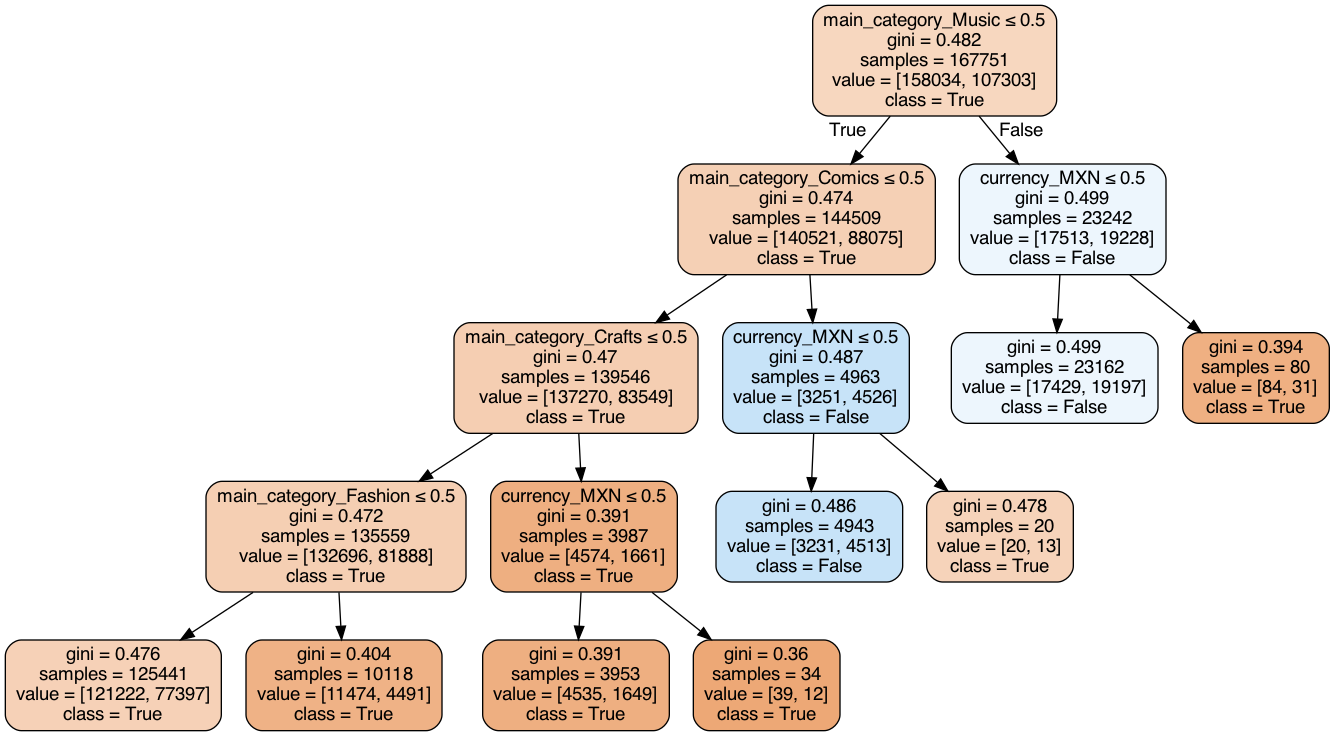

3


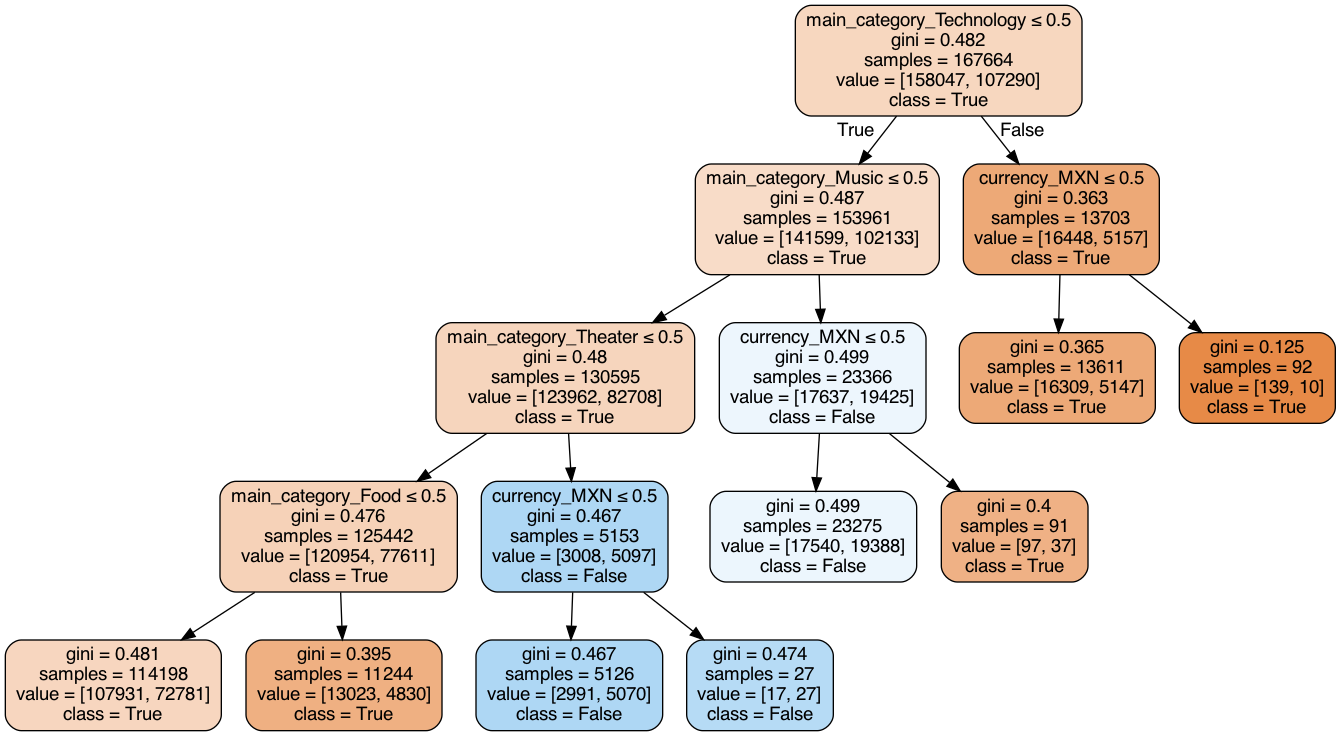

4


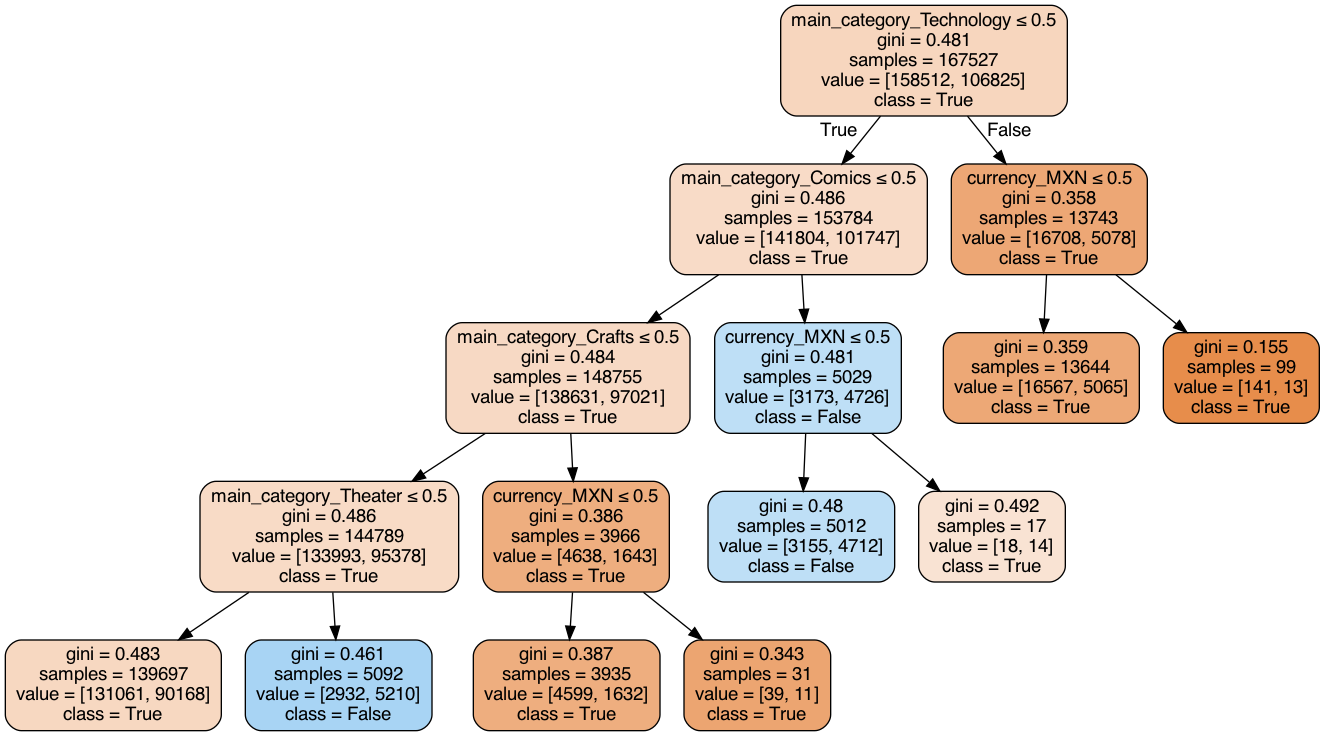

5


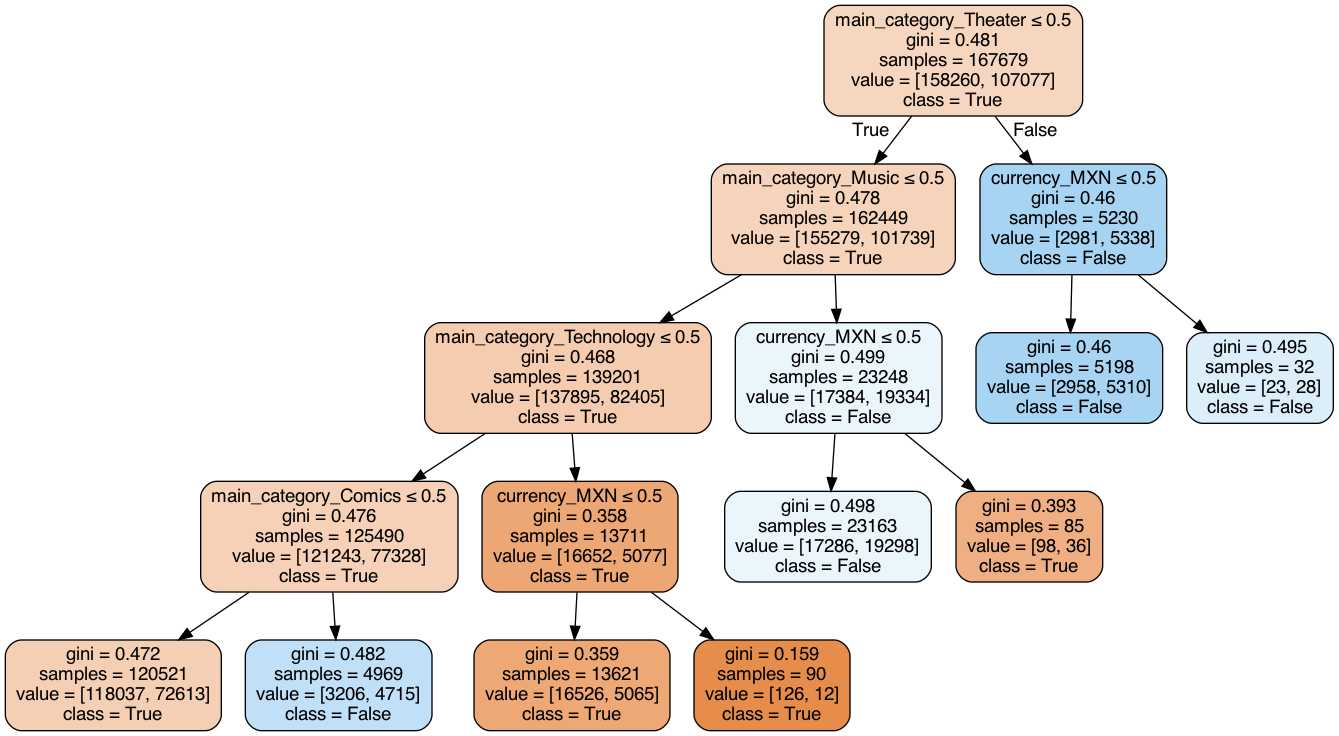

6


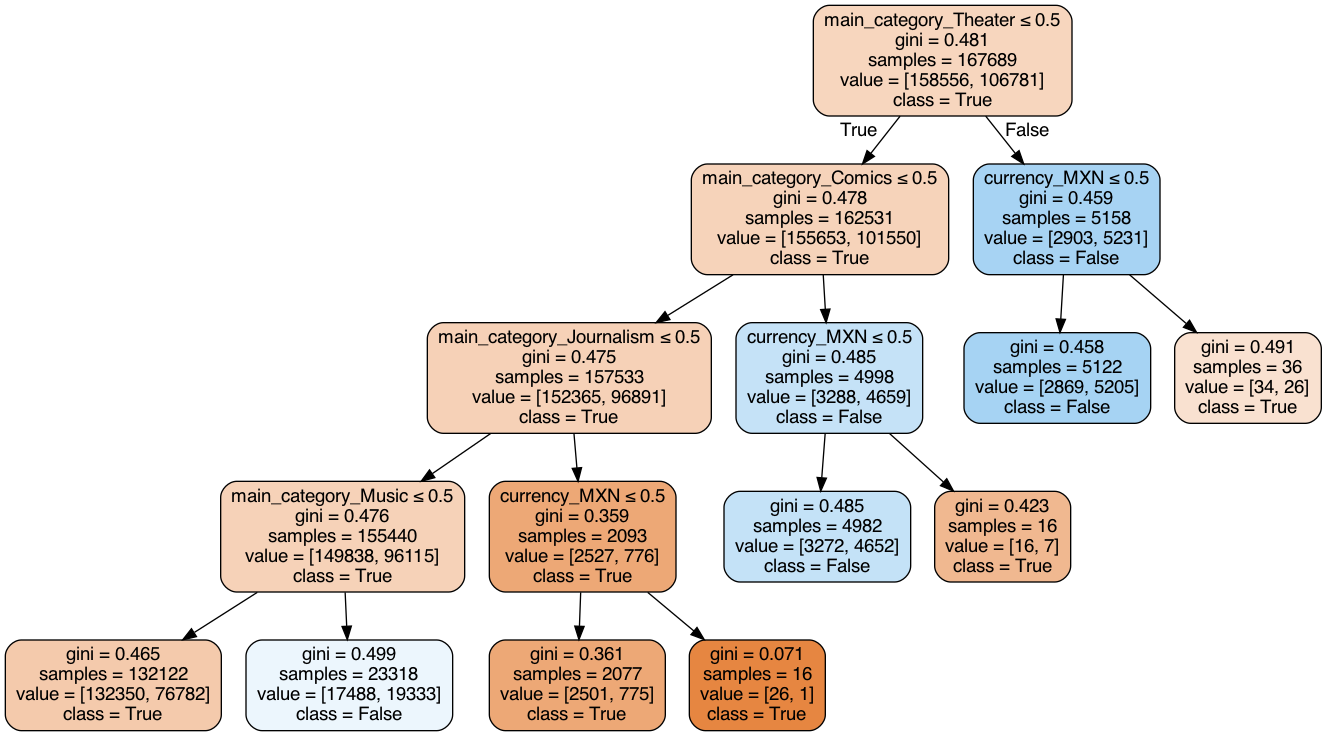

7


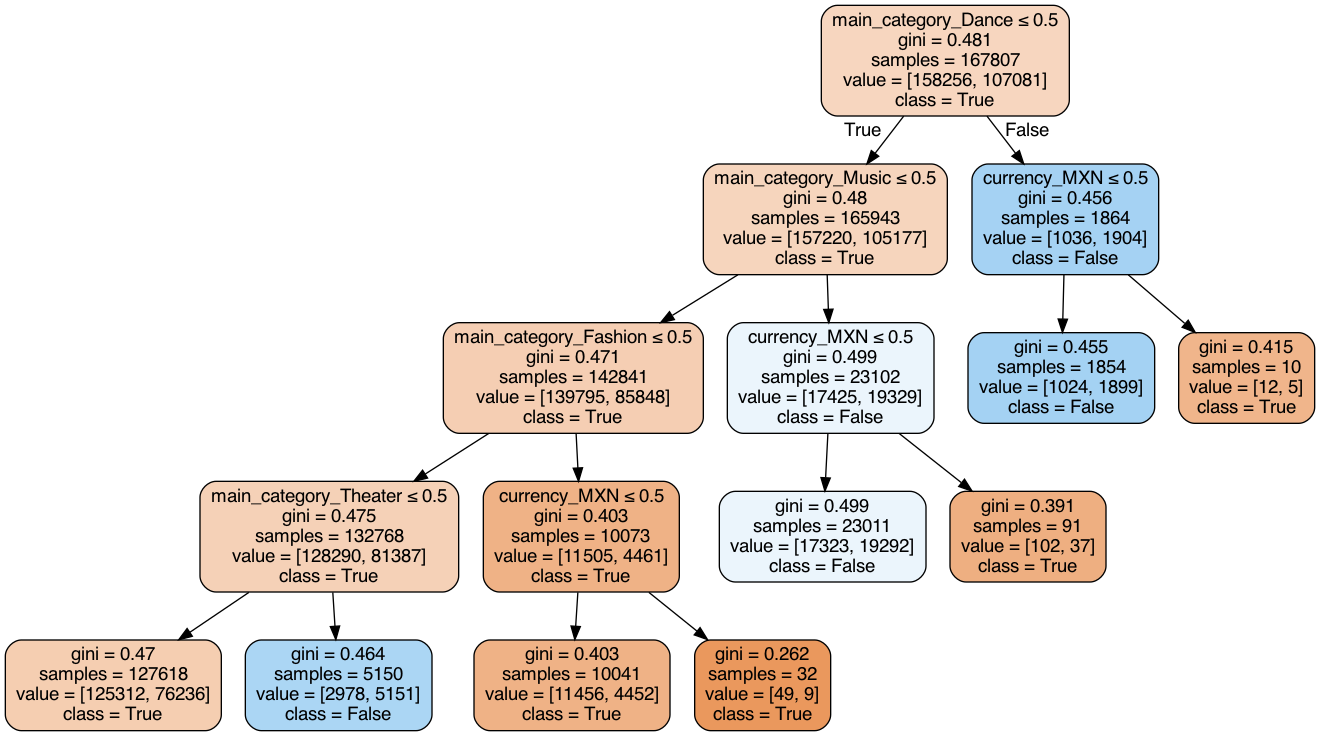

8


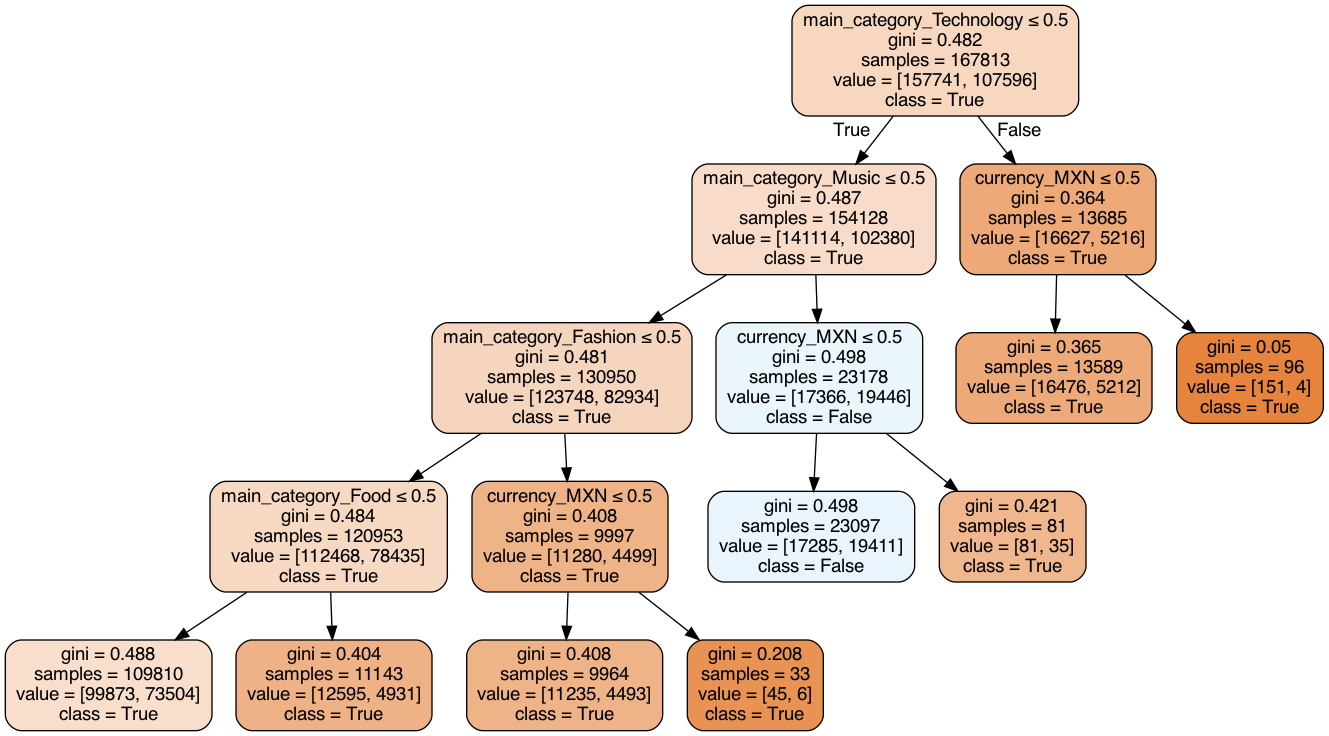

9


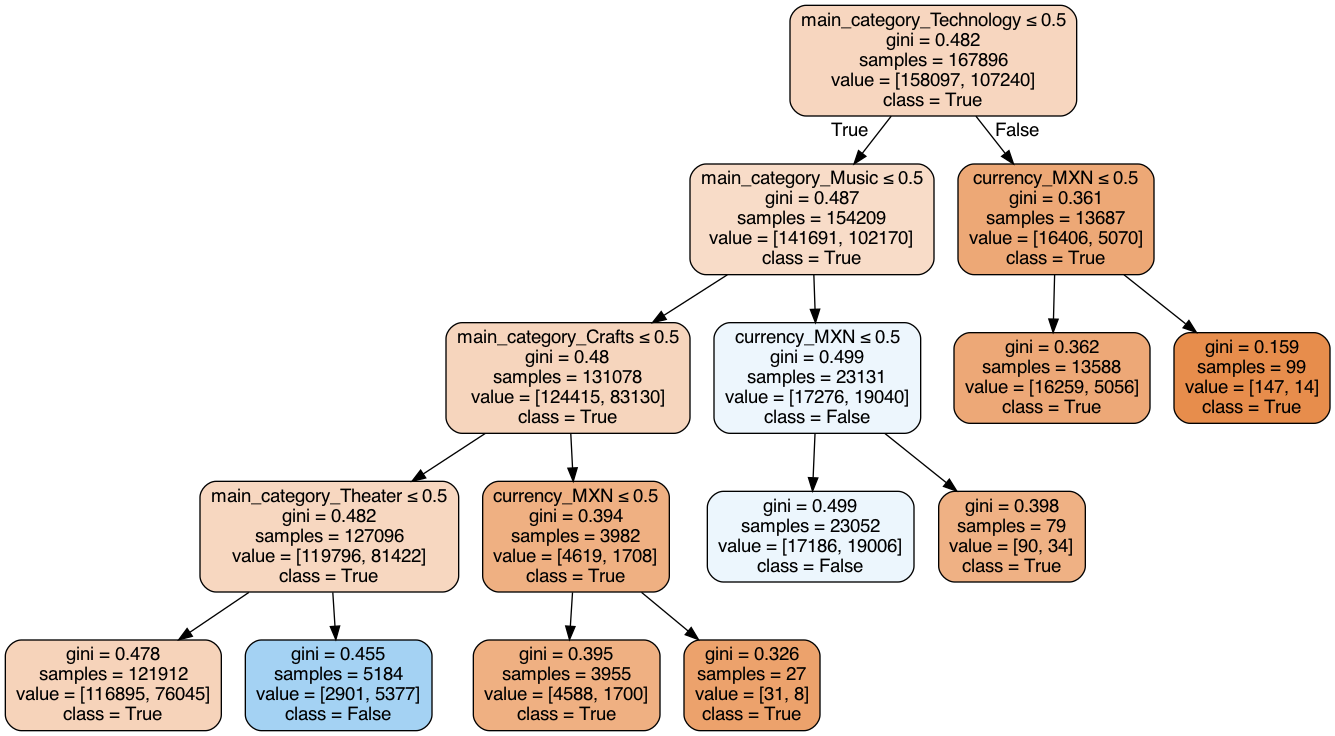

In [30]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

for i, est in enumerate(clf.estimators_):
    print(i)
    
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,  
                         feature_names=X_name.columns,  
                     class_names=["True","False"], 
                         filled=True, rounded=True,  
                         special_characters=True) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))

In [64]:
#アダブースト
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,
                                                                                 min_samples_leaf=2,
                                                                                 min_samples_split=2, 
                                                                                 random_state=1234,
                                                                                 criterion="gini"),
                                           n_estimators=10, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

score= 0.6210554879266744


In [58]:
# ラベルを予測
y_est = clf.predict(X_test)

# 確率値を得る
y_est_proba = clf.predict_proba(X_test)
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
display(conf_mat)

print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_est)))
print("precission : {:.5f}".format(precision_score(y_test, y_est)))
print("recall : {:.5f}".format(recall_score(y_test, y_est)))

予測 = 成功  予測 = 失敗
正解 = 成功    33449     6100
正解 = 失敗    19037     7749

Accuracy: 0.62106
precission : 0.55953
recall : 0.28929


0


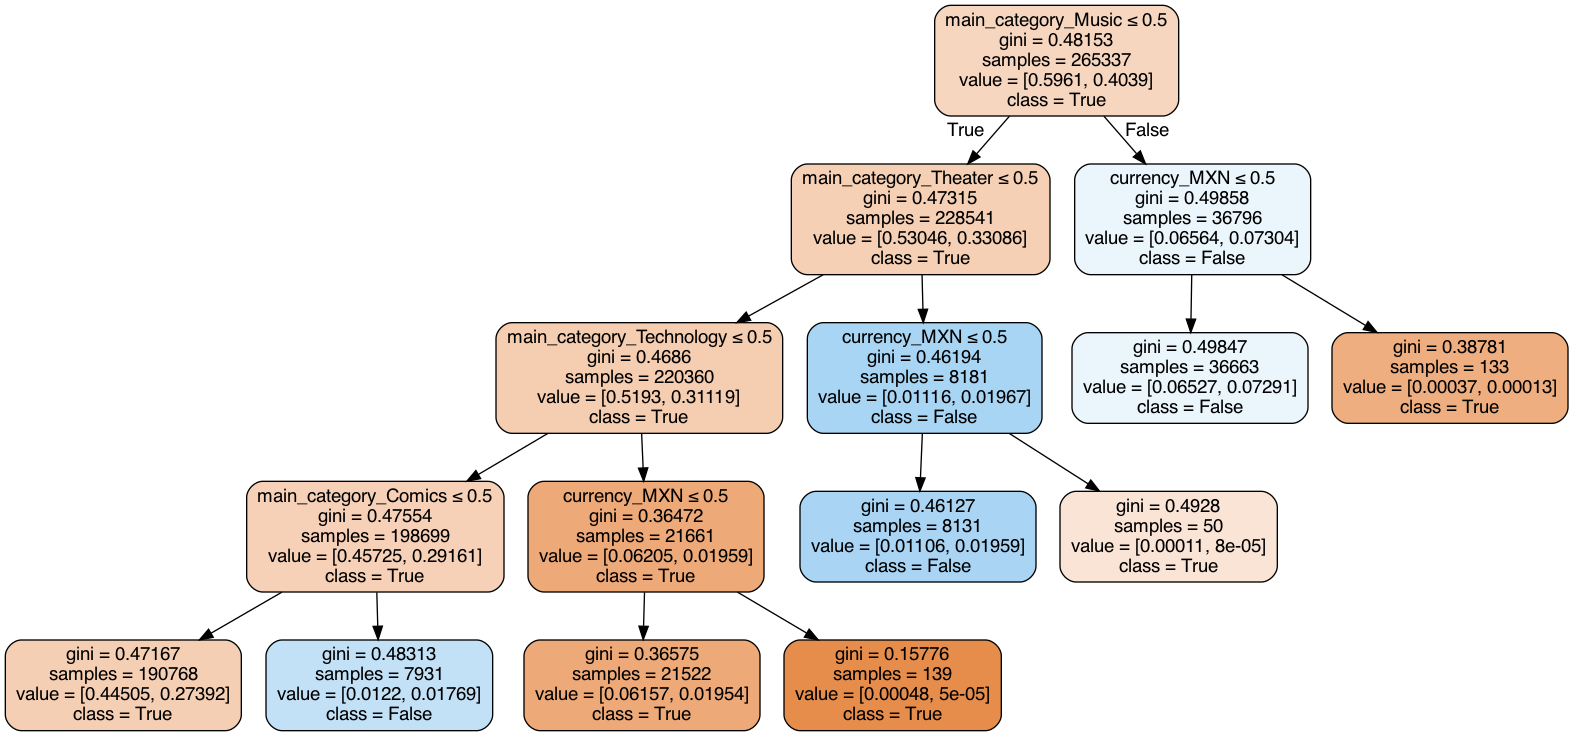

1


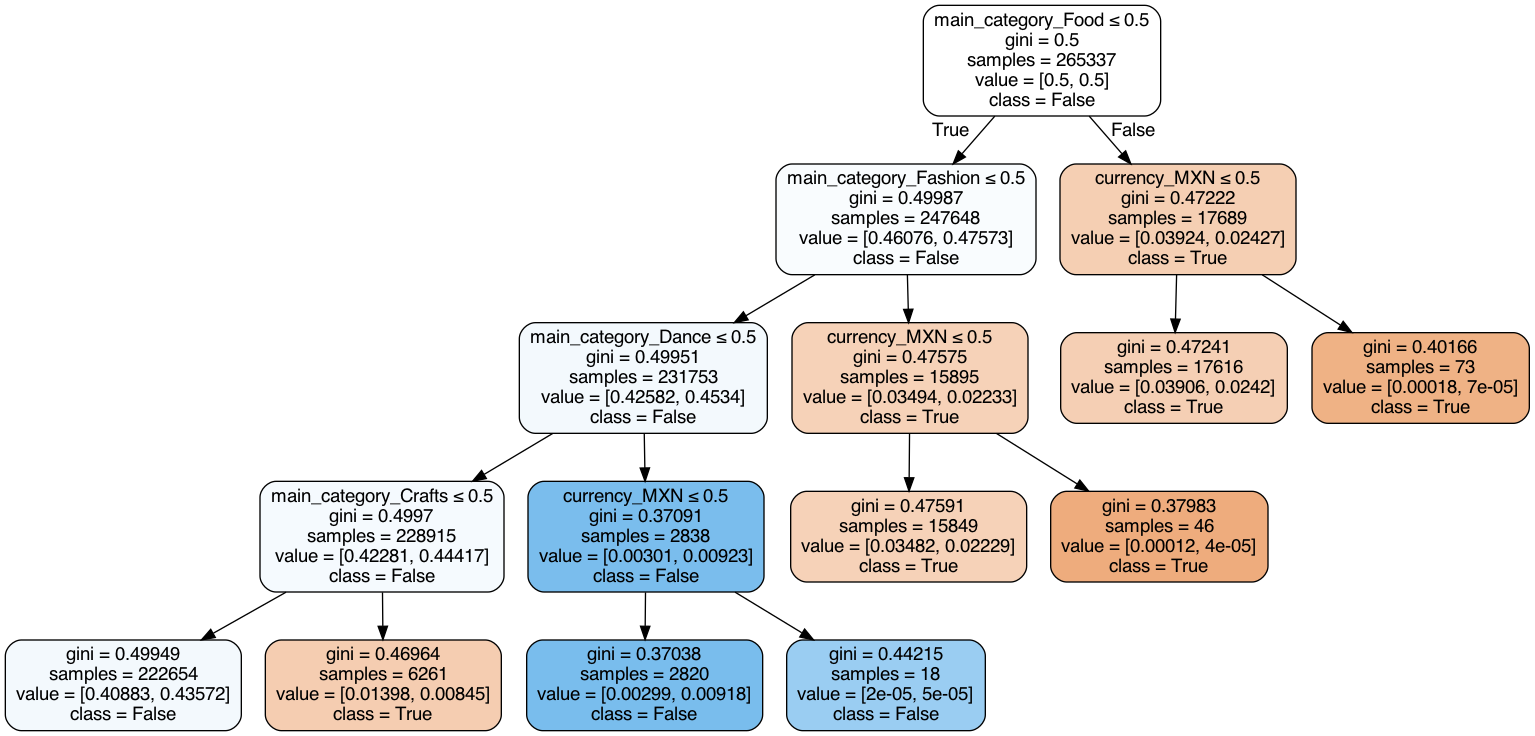

2


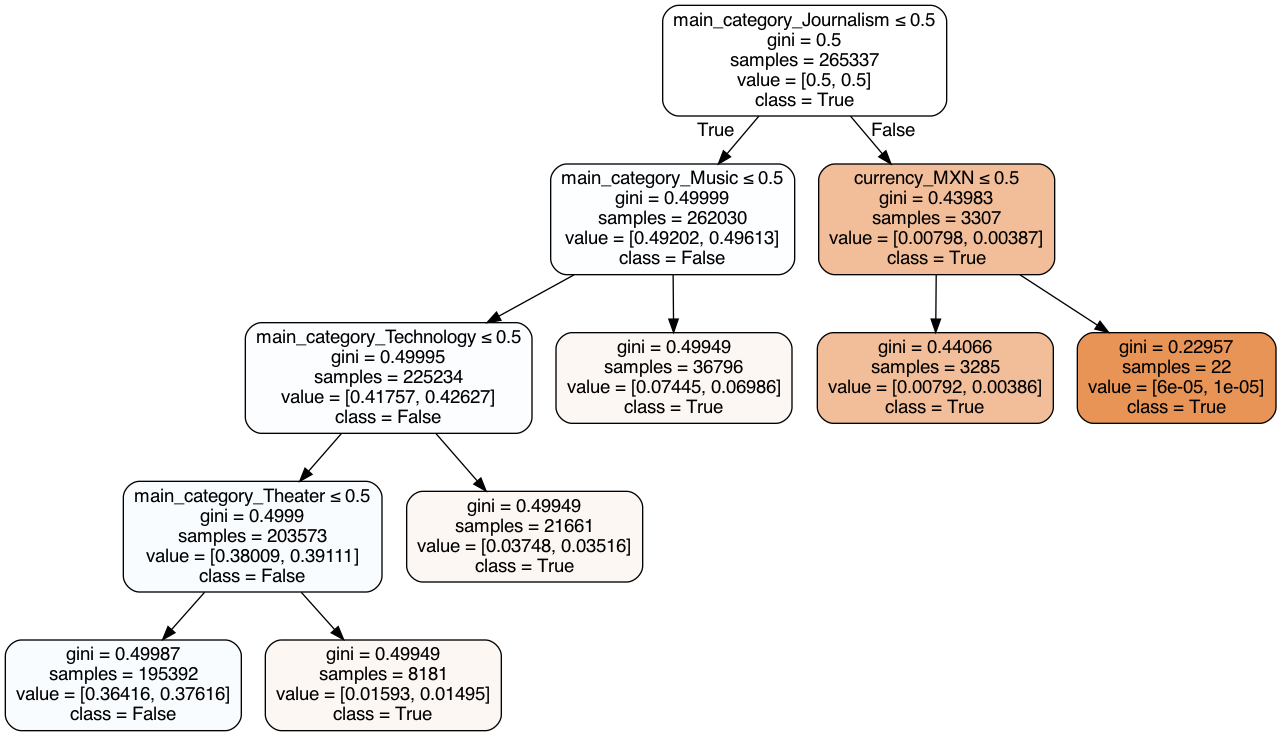

3


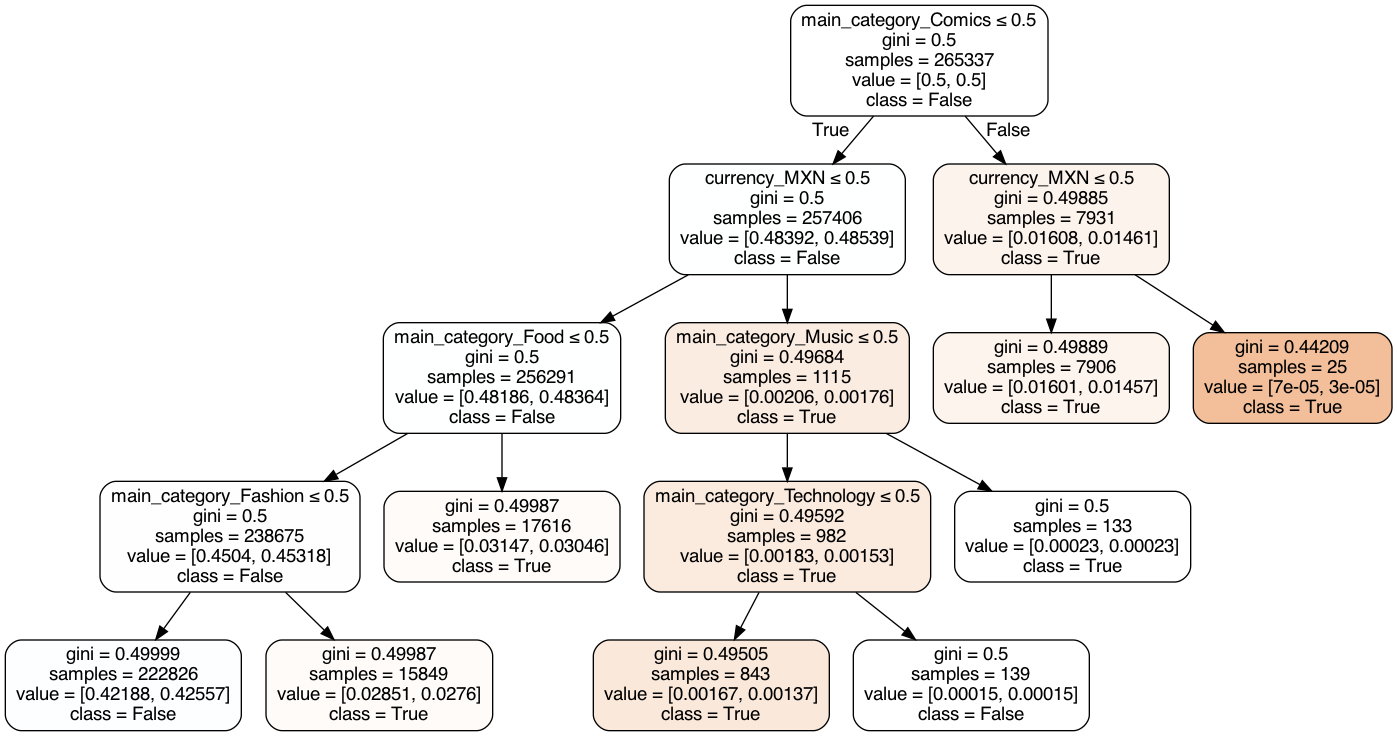

4


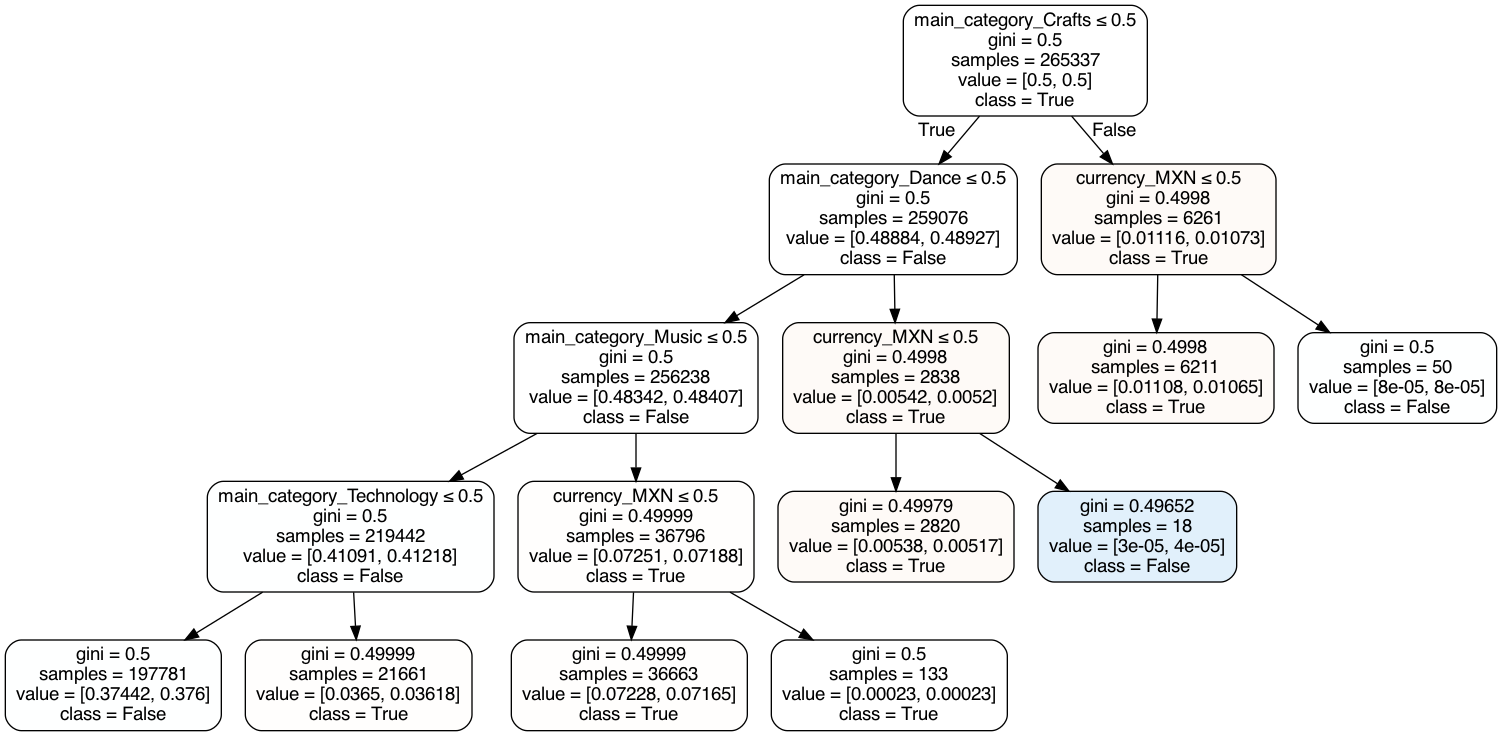

5


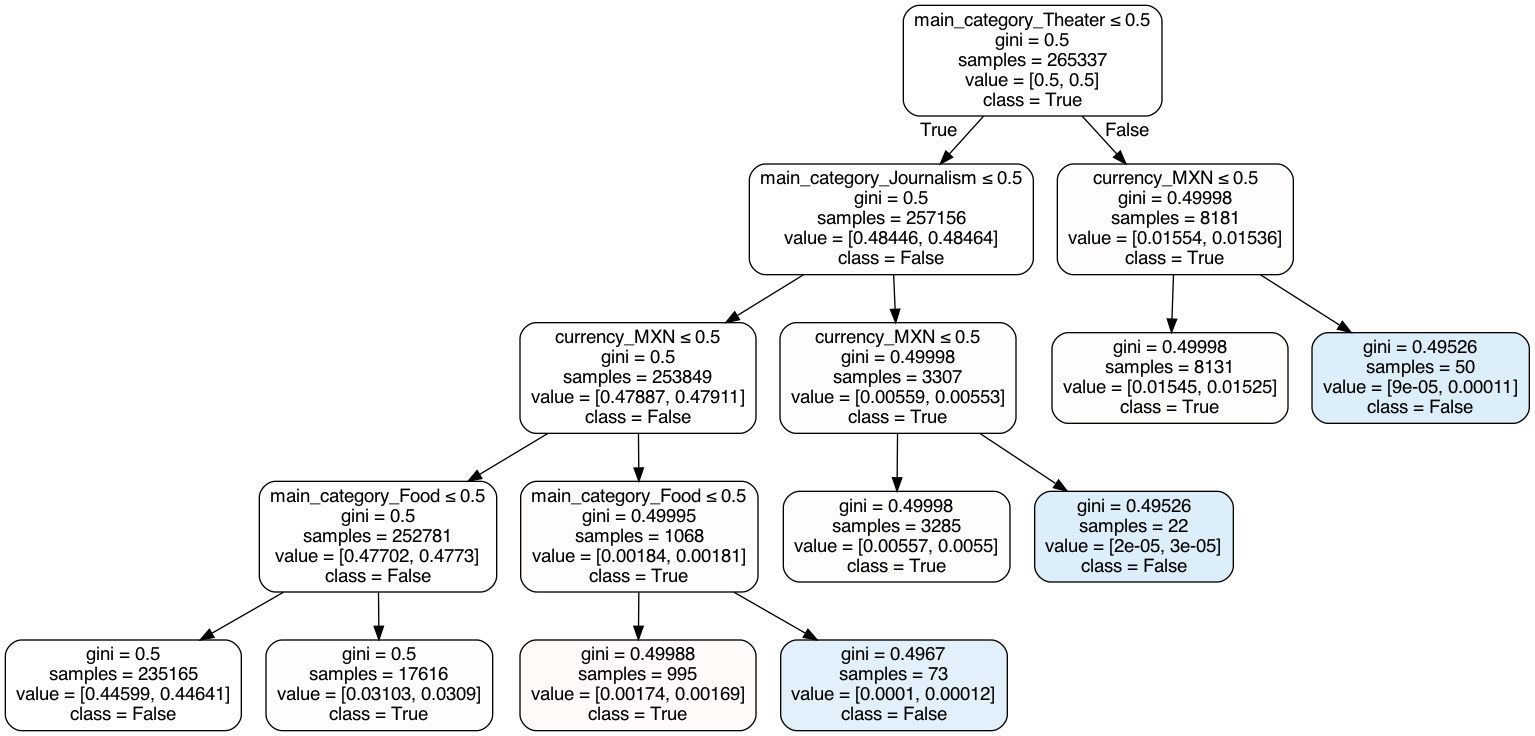

6


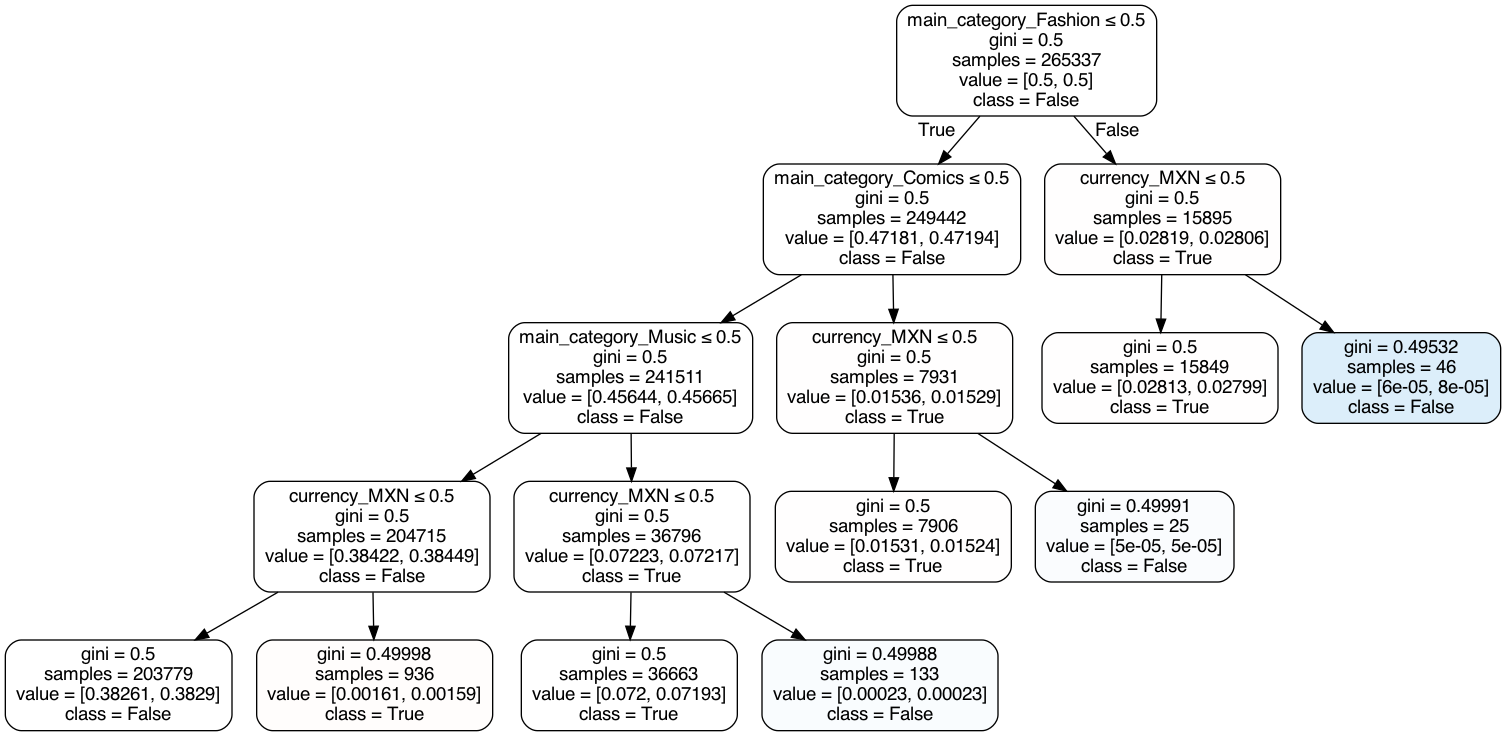

7


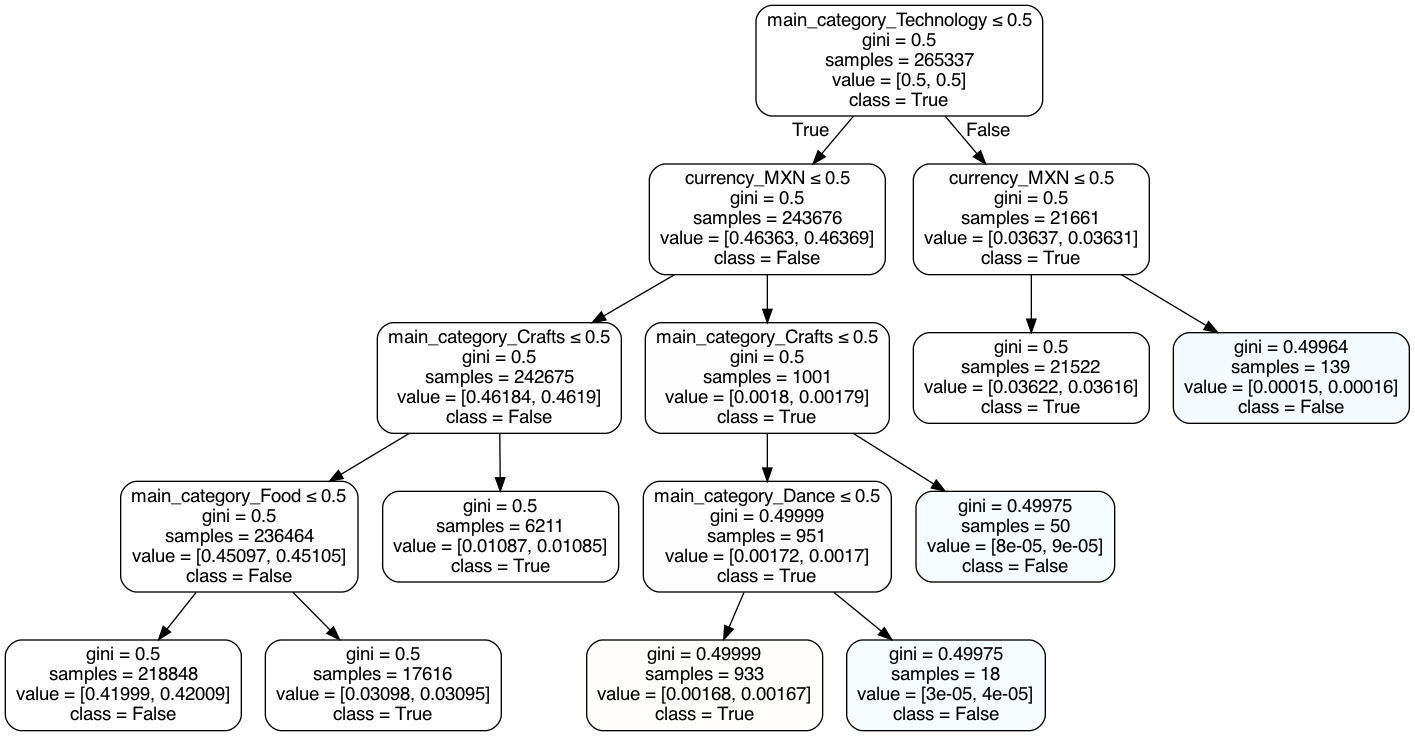

8


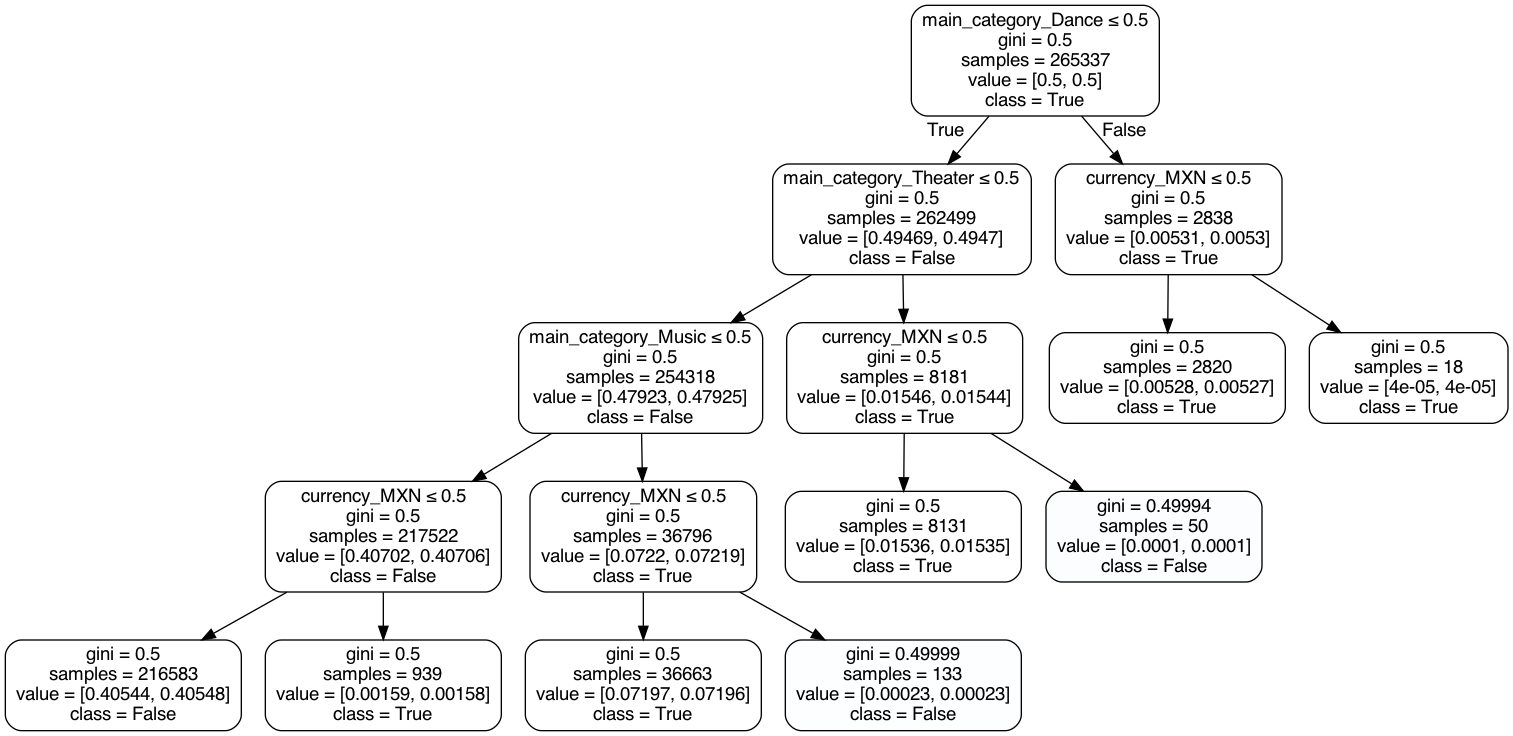

9


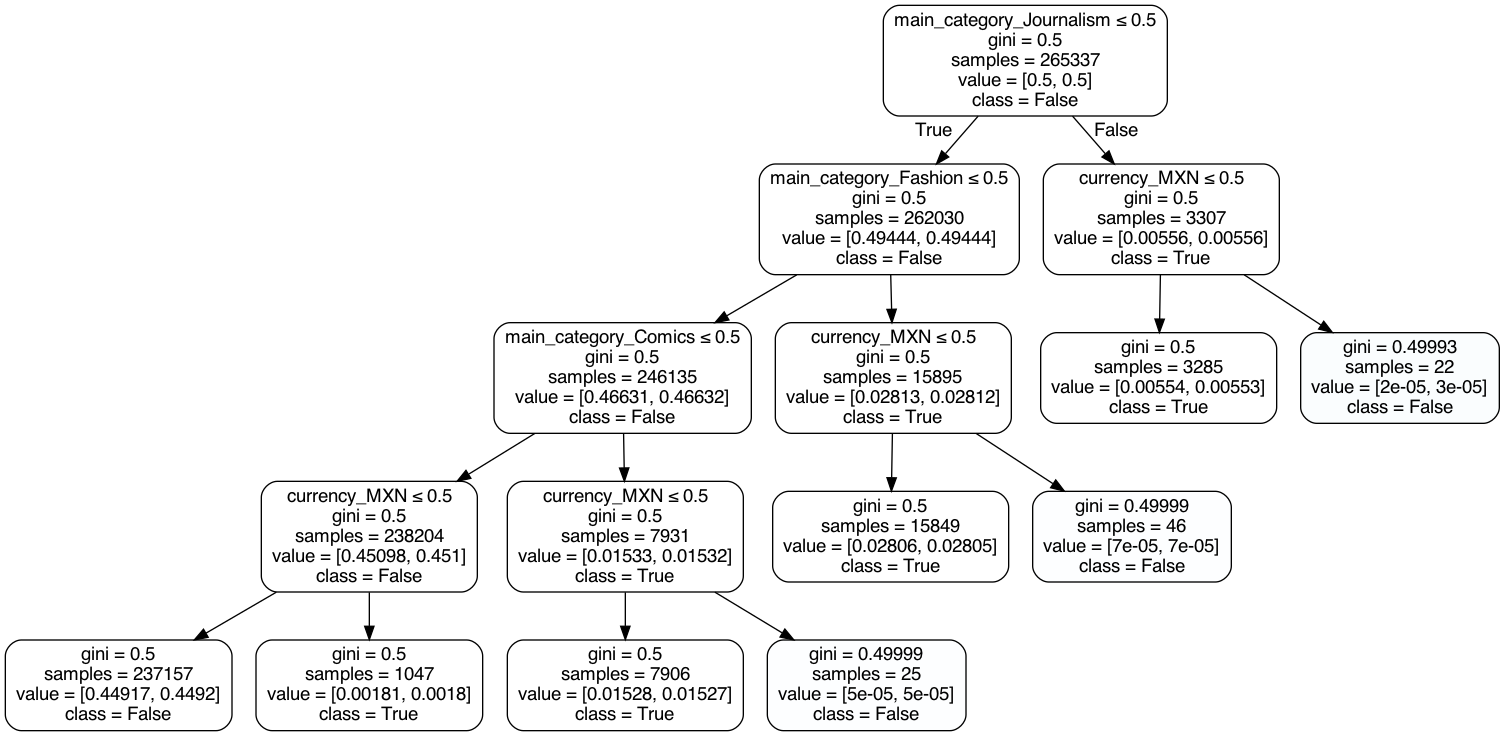

In [34]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

for i, est in enumerate(clf.estimators_):
    print(i)
    
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,
                           feature_names=X_name.columns,  
                     class_names=["True","False"],
                         filled=True, rounded=True,  
                         special_characters=True,precision=5) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))
    graph.write_pdf('iris_ada_{}.pdf'.format(i))

In [35]:
#tensorflow
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix
from tensorflow import keras  
import tensorflow as tf


/Users/eguchikazuki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/eguchikazuki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/eguchikazuki/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/eguchikazuki/opt/anaconda3/lib/python3.7/s

In [40]:
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

model = Sequential()
model.add(Dense(15, activation='relu', input_dim=10))
model.add(Dense(5, activation='relu', input_dim=15))
model.add(Dense(2, activation='softmax'))#最終層のactivationは変更しないこと

# ------ 最適化手法 ------
sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
# rms = RMSprop(lr=0.01)
# adag = Adagrad(lr=0.01)
# adad = Adadelta(lr=0.01)
# adam = Adam(lr=0.01)
# -----------------------------

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# WARNINGが出るが気にしなくて良い

In [41]:
# 計算の実行　50ループ 20個
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
fit = model.fit(X_train, y_train_onehot,
          epochs=50,
          batch_size=20,validation_data=(X_test, y_test_onehot))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

Using TensorFlow backend.


Train on 265337 samples, validate on 66335 samples
Epoch 1/50
265337/265337 [==============================] - 18s 66us/sample - loss: 0.6552 - acc: 0.6175 - val_loss: 0.6527 - val_acc: 0.6211
Epoch 2/50
265337/265337 [==============================] - 18s 66us/sample - loss: 0.6541 - acc: 0.6197 - val_loss: 0.6522 - val_acc: 0.6211
Epoch 3/50
265337/265337 [==============================] - 15s 57us/sample - loss: 0.6542 - acc: 0.6195 - val_loss: 0.6530 - val_acc: 0.6211
Epoch 4/50
265337/265337 [==============================] - 16s 62us/sample - loss: 0.6541 - acc: 0.6196 - val_loss: 0.6526 - val_acc: 0.6211
Epoch 5/50
265337/265337 [==============================] - 15s 57us/sample - loss: 0.6540 - acc: 0.6199 - val_loss: 0.6561 - val_acc: 0.6135
Epoch 6/50
265337/265337 [==============================] - 16s 59us/sample - loss: 0.6537 - acc: 0.6201 - val_loss: 0.6527 - val_acc: 0.6211
Epoch 7/50
265337/265337 [==============================] - 16s 59us/sample - loss: 0.6537 - acc:

In [42]:
from tensorflow.compat.v1.keras.models import load_model

# 保存
model.save('my_model.h5')
del model

# 読み込み
model = load_model('my_model.h5')

# WARNINGが出るが気にしなくて良い
y_pred = np.argmax(model.predict(X_test),axis=1)
# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_pred)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
正答率 = 61.354%


In [45]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
display(conf_mat)

print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))
print("precission : {:.5f}".format(precision_score(y_test, y_pred)))
print("recall : {:.5f}".format(recall_score(y_test, y_pred)))

予測 = 成功  予測 = 失敗
正解 = 成功    37760     1789
正解 = 失敗    23847     2939

Accuracy: 0.61354
precission : 0.62162
recall : 0.10972
